Import Library

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import itertools
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
fileDownloaded = drive.CreateFile({'id':'10sFNtaAXsIKIX18ldF1ouAKMtOFqEswh'})

In [ ]:
fileDownloaded.GetContentFile('Dataset_Normalisasi.xlsx')

Pengumpulan Data

In [ ]:
data = pd.read_csv("dataset_sample.csv")
data.head()

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
0,2021-12-01,63,100,43,13,41,30,100,PM25,SEDANG,DKI4
1,2021-12-02,35,56,42,7,40,14,56,PM25,SEDANG,DKI4
2,2021-12-03,54,71,43,9,48,17,71,PM25,SEDANG,DKI4
3,2021-12-04,50,65,45,13,43,16,65,PM25,SEDANG,DKI3
4,2021-12-05,53,80,44,17,39,29,80,PM25,SEDANG,DKI4


In [ ]:
data = pd.read_excel("dataset.xlsx")
data.head()

,pm10,pm25,so2,co,o3,no2,categori
0,0.33,0.298758,0.400000,0.16,0.223944,0.233333,0.5
1,0.22,0.263975,0.377778,0.18,0.314085,0.153333,0.9
2,0.39,0.323602,0.355556,0.18,0.274648,0.233333,0.5
3,0.25,0.273913,0.344444,0.12,0.229577,0.153333,0.9
4,0.33,0.298758,0.344444,0.16,0.223944,0.180000,0.5


Preprocessing Data

In [ ]:
#Data Selection
data = pd.DataFrame(data[['pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'categori']])
data.head()

,pm10,pm25,so2,co,o3,no2,categori
0,0.33,0.298758,0.400000,0.16,0.223944,0.233333,0.5
1,0.22,0.263975,0.377778,0.18,0.314085,0.153333,0.9
2,0.39,0.323602,0.355556,0.18,0.274648,0.233333,0.5
3,0.25,0.273913,0.344444,0.12,0.229577,0.153333,0.9
4,0.33,0.298758,0.344444,0.16,0.223944,0.180000,0.5


In [ ]:
#Data Cleaning
data.dropna()
data.isna().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pm10      1517 non-null   float64
 1   pm25      1517 non-null   float64
 2   so2       1517 non-null   float64
 3   co        1517 non-null   float64
 4   o3        1517 non-null   float64
 5   no2       1517 non-null   float64
 6   categori  1517 non-null   float64
dtypes: float64(7)
memory usage: 83.1 KB


In [ ]:
#Data Transformation (Min-Max Scaler)
mc = MinMaxScaler()
data = mc.fit_transform(data)

data

array([[0.1402439 , 0.2484472 , 0.3375    , ..., 0.16083916, 0.16129032,
        0.5       ],
       [0.07317073, 0.20496894, 0.3125    , ..., 0.27272727, 0.06451613,
        1.        ],
       [0.17682927, 0.27950311, 0.2875    , ..., 0.22377622, 0.16129032,
        0.5       ],
       ...,
       [0.11585366, 0.25465839, 0.325     , ..., 0.11888112, 0.41935484,
        0.5       ],
       [0.23170732, 0.38509317, 0.2875    , ..., 0.1048951 , 0.66129032,
        0.5       ],
       [0.27439024, 0.45962733, 0.325     , ..., 0.15384615, 0.80645161,
        0.5       ]])

In [ ]:
#Data Transformation
data = pd.DataFrame(data)
data.columns = ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'categori']
data

,pm10,pm25,so2,co,o3,no2,categori
0,0.140244,0.248447,0.3375,0.097561,0.160839,0.161290,0.5
1,0.073171,0.204969,0.3125,0.121951,0.272727,0.064516,1.0
2,0.176829,0.279503,0.2875,0.121951,0.223776,0.161290,0.5
3,0.091463,0.217391,0.2750,0.048780,0.167832,0.064516,1.0
4,0.140244,0.248447,0.2750,0.097561,0.160839,0.096774,0.5
...,...,...,...,...,...,...,...
1512,0.237805,0.391304,0.4250,0.292683,0.090909,0.709677,0.5
1513,0.176829,0.341615,0.2250,0.219512,0.090909,0.483871,0.5
1514,0.115854,0.254658,0.3250,0.146341,0.118881,0.419355,0.5
1515,0.231707,0.385093,0.2875,0.317073,0.104895,0.661290,0.5


In [ ]:
#Data Transformation (Label Encoder)
le = LabelEncoder()
data['categori'] = le.fit_transform(data['categori'])

data

,pm10,pm25,so2,co,o3,no2,categori
0,0.140244,0.248447,0.3375,0.097561,0.160839,0.161290,1
1,0.073171,0.204969,0.3125,0.121951,0.272727,0.064516,2
2,0.176829,0.279503,0.2875,0.121951,0.223776,0.161290,1
3,0.091463,0.217391,0.2750,0.048780,0.167832,0.064516,2
4,0.140244,0.248447,0.2750,0.097561,0.160839,0.096774,1
...,...,...,...,...,...,...,...
1512,0.237805,0.391304,0.4250,0.292683,0.090909,0.709677,1
1513,0.176829,0.341615,0.2250,0.219512,0.090909,0.483871,1
1514,0.115854,0.254658,0.3250,0.146341,0.118881,0.419355,1
1515,0.231707,0.385093,0.2875,0.317073,0.104895,0.661290,1


In [ ]:
class_names = ['Tidak Sehat', 'Sedang', 'Sehat']

In [ ]:
data.to_csv('dataset.csv')

Split Data (Data Training dan Data Testing)

In [ ]:
#Membagi input dan output
x = data.iloc[:,0:6].values
y = data.iloc[:,-1].values

In [ ]:
x[0]

array([0.1402439 , 0.2484472 , 0.3375    , 0.09756098, 0.16083916,
       0.16129032])

In [ ]:
y[0]

1

In [ ]:
#Split Data (Data Training dan Data Testing)
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape 

((1213, 6), (304, 6), (1213,), (304,))

In [ ]:
xtrain[0]

array([0.23170732, 0.47826087, 0.45      , 0.14634146, 0.09090909,
       0.25806452])

In [ ]:
ytrain[0]

1

Membangun Model BackPropagation 

In [ ]:
#Model Backpropagation
modal = tf.keras.models.Sequential() #Membuat model arsitektur

modal.add(tf.keras.layers.Dense(units=6, activation='relu')) #Input
modal.add(tf.keras.layers.Dense(units=30, activation='relu')) #Hidden Layer
modal.add(tf.keras.layers.Dense(units=3, activation='softmax')) #Output

modal.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = modal.fit(xtrain,ytrain, epochs=100, batch_size=128, validation_data=(xtest,ytest)) 

Epoch 1/100
10/10 [==============================] - 1s 24ms/step - loss: 1.1586 - accuracy: 0.1616 - val_loss: 1.1281 - val_accuracy: 0.1678
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 1.1055 - accuracy: 0.1863 - val_loss: 1.0790 - val_accuracy: 0.2664
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 1.0604 - accuracy: 0.4839 - val_loss: 1.0360 - val_accuracy: 0.6776
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 1.0209 - accuracy: 0.7172 - val_loss: 0.9964 - val_accuracy: 0.7533
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.9832 - accuracy: 0.7552 - val_loss: 0.9546 - val_accuracy: 0.7664
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.9423 - accuracy: 0.7535 - val_loss: 0.9098 - val_accuracy: 0.7664
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.8982 - accuracy: 0.7535 - val_loss: 0.8635 - val_accuracy: 0.7664
Epoch 8/100


Pengujian / Evaluasi Model

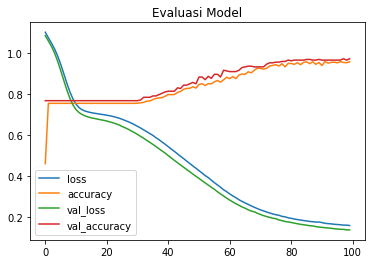

In [ ]:
pd.DataFrame(hist.history).plot(title="Evaluasi Model")

Text(0.5, 1.0, 'Accuracy evolution')

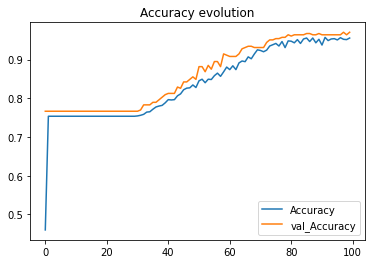

In [ ]:
plt.plot(hist.history['accuracy'], label='Accuracy')
plt.plot(hist.history['val_accuracy'], label='val_Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy evolution')

Text(0.5, 1.0, 'Loss evolution')

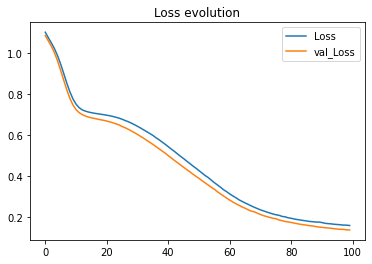

In [ ]:
plt.plot(hist.history['loss'], label='Loss')
plt.plot(hist.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

In [ ]:
yprediksi = model.predict(xtest)

10/10 [==============================] - 0s 2ms/step


In [ ]:
yprediksi = yprediksi.argmax(axis=1)

In [ ]:
print("Predict Outputs:\n", yprediksi, end='\n\n')
print("Correct Outputs:\n", ytest, end='\n\n')

Predict Outputs:
 [0 1 0 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 2 1 1
 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1
 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 2 1 1 2 1 1 0 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 0 1 1 1 0 1 1 1 2 1 2 1 1 1 1 1 1 0
 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 2 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 0 2 1 1 0 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 2 1 1 1 1 1 0 1 2 1 1 0 1 1 0 2 0 1 1
 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 2 1 2
 1 1 1 1 1 2 2 0]

Correct Outputs:
 [0 1 0 1 1 1 1 1 1 2 1 1 0 1 1 2 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 2 1 1
 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1
 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 2 1 1 0 1 2 1 1 1 1 0 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 0 2 1 1 0 1 1 1 2 1 2 1 1 1 1 1 1 0
 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 

In [ ]:
#Pengujian (Confusion Matrix)
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 

  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
#Pengujian (Confusion Matrix)
confusion_matrix(y_true=ytest, y_pred=yprediksi)

array([[ 46,   4,   0],
       [  1, 230,   2],
       [  0,   2,  19]])

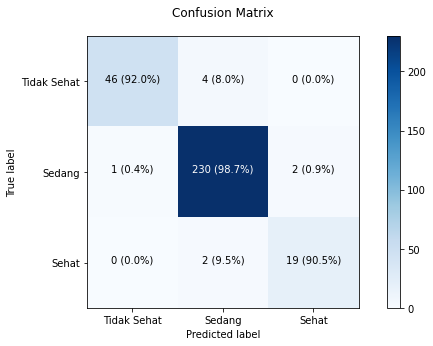

In [ ]:
#Pengujian (Confusion Matrix)
make_confusion_matrix(y_true=ytest, 
                      y_pred=yprediksi,
                      classes=class_names,
                      figsize=(10, 5),
                      text_size=10)

### **Save and Load Your Model**

In [ ]:
!pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# save the model from file
model.save('model.h5')

In [ ]:
from tensorflow.keras.models import load_model

# load the model from file
model = load_model('model.h5')